#Step1 : import the necessary libarary

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense


In [2]:

# Step 1: Load the dataset
df = pd.read_csv("used_bikes.csv")  # or the correct path
df = df.drop_duplicates()           # if not already done
df = df.drop(columns=['bike_name']) # remove high-cardinality text column




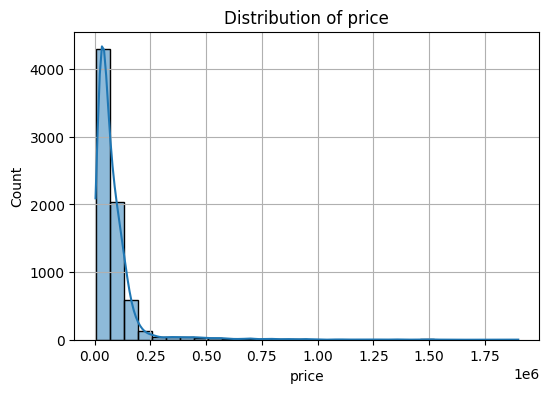

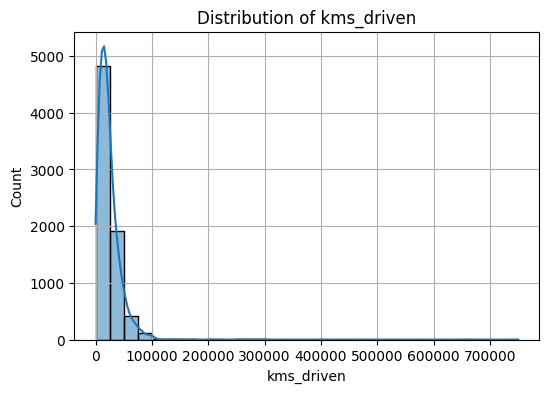

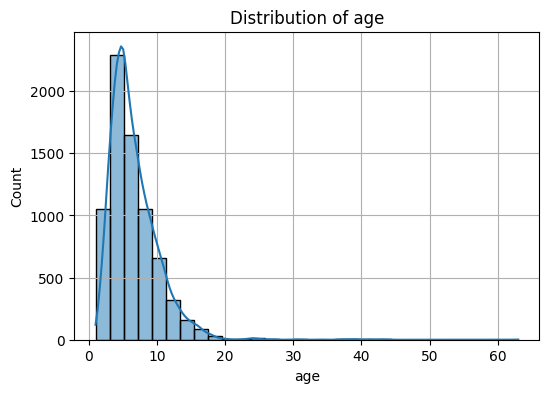

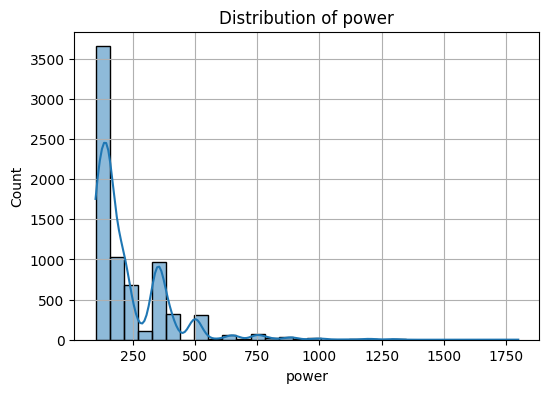

In [3]:
# 3. Distribution of Numerical Features
num_cols = ['price', 'kms_driven', 'age', 'power']
for col in num_cols:
    plt.figure(figsize=(6, 4))
    sns.histplot(df[col], kde=True, bins=30)
    plt.title(f"Distribution of {col}")
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.grid(True)
    plt.show()



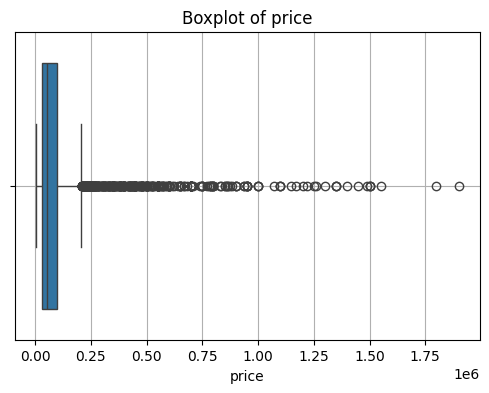

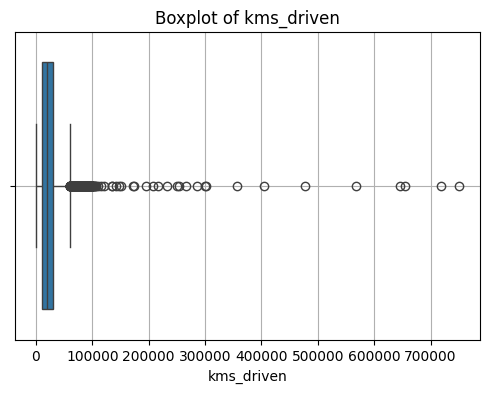

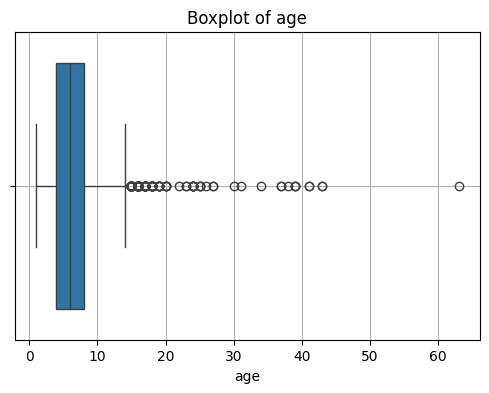

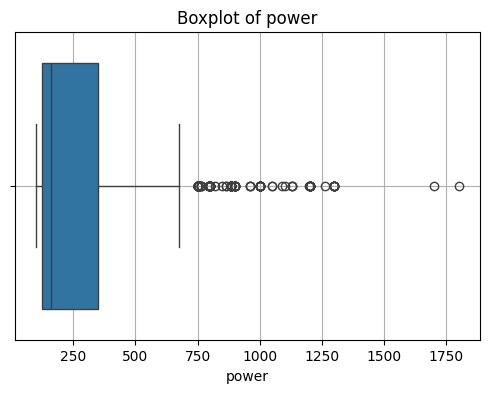

In [4]:
# 4. Boxplots for Outlier Detection
for col in num_cols:
    plt.figure(figsize=(6, 4))
    sns.boxplot(x=df[col])
    plt.title(f"Boxplot of {col}")
    plt.grid(True)
    plt.show()

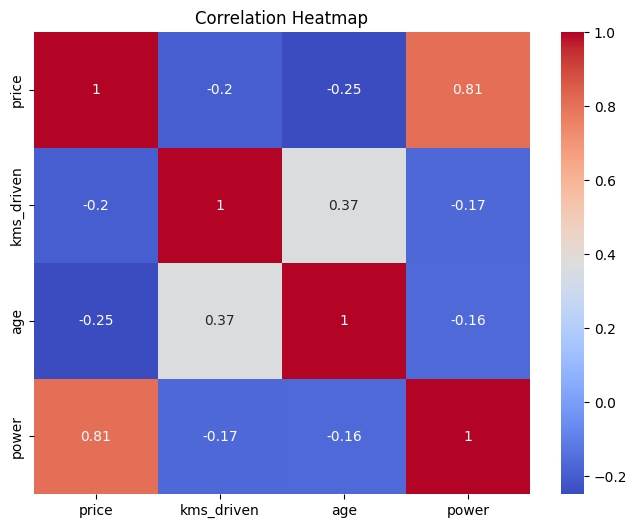

In [5]:
# 5. Correlation Heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

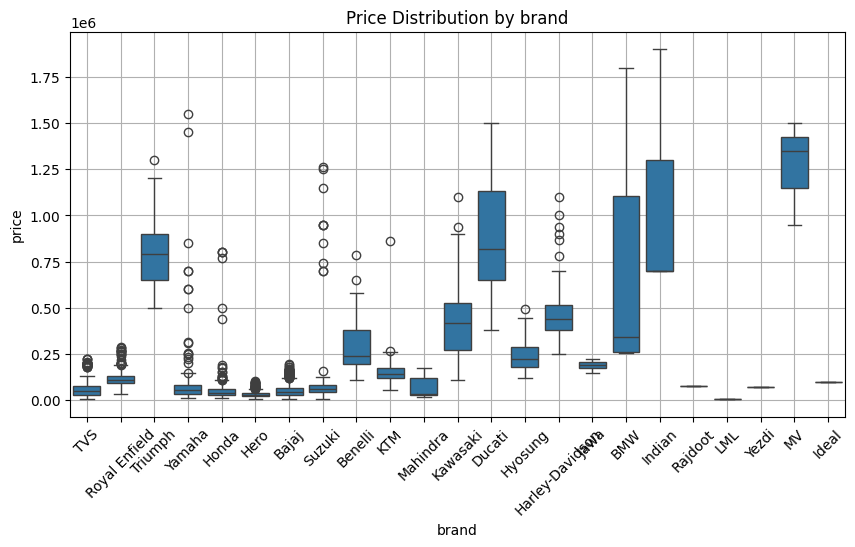

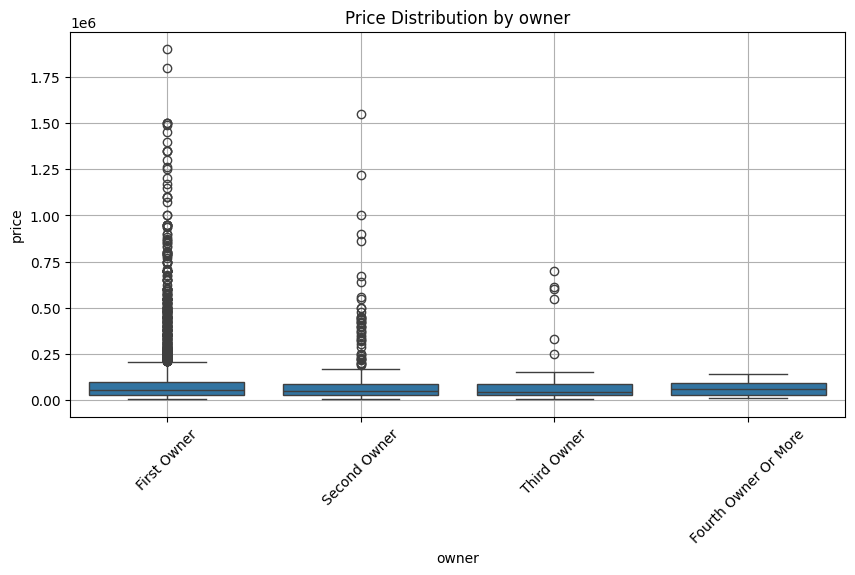

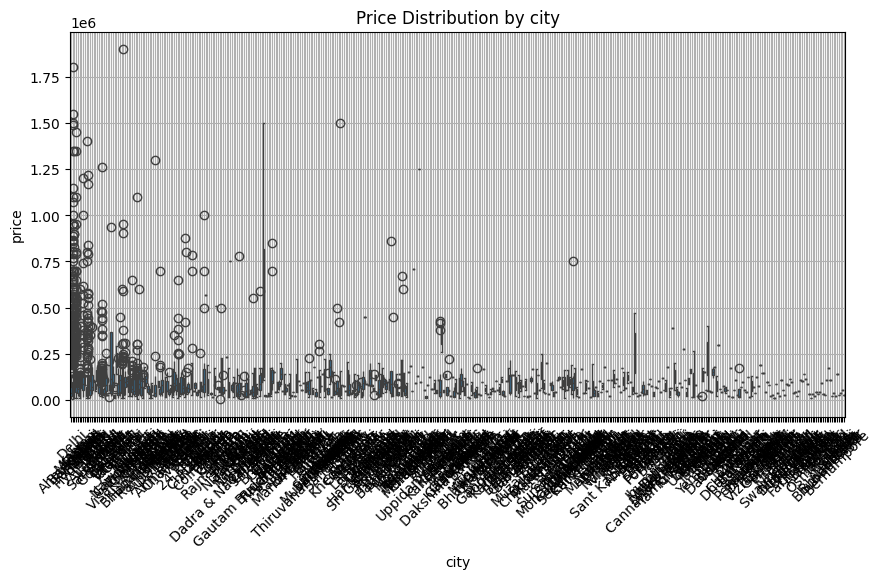

In [6]:
# 6. Price vs Categorical Features
cat_cols = ['brand', 'owner', 'city']
for col in cat_cols:
    plt.figure(figsize=(10, 5))
    sns.boxplot(data=df, x=col, y='price')
    plt.xticks(rotation=45)
    plt.title(f"Price Distribution by {col}")
    plt.grid(True)
    plt.show()

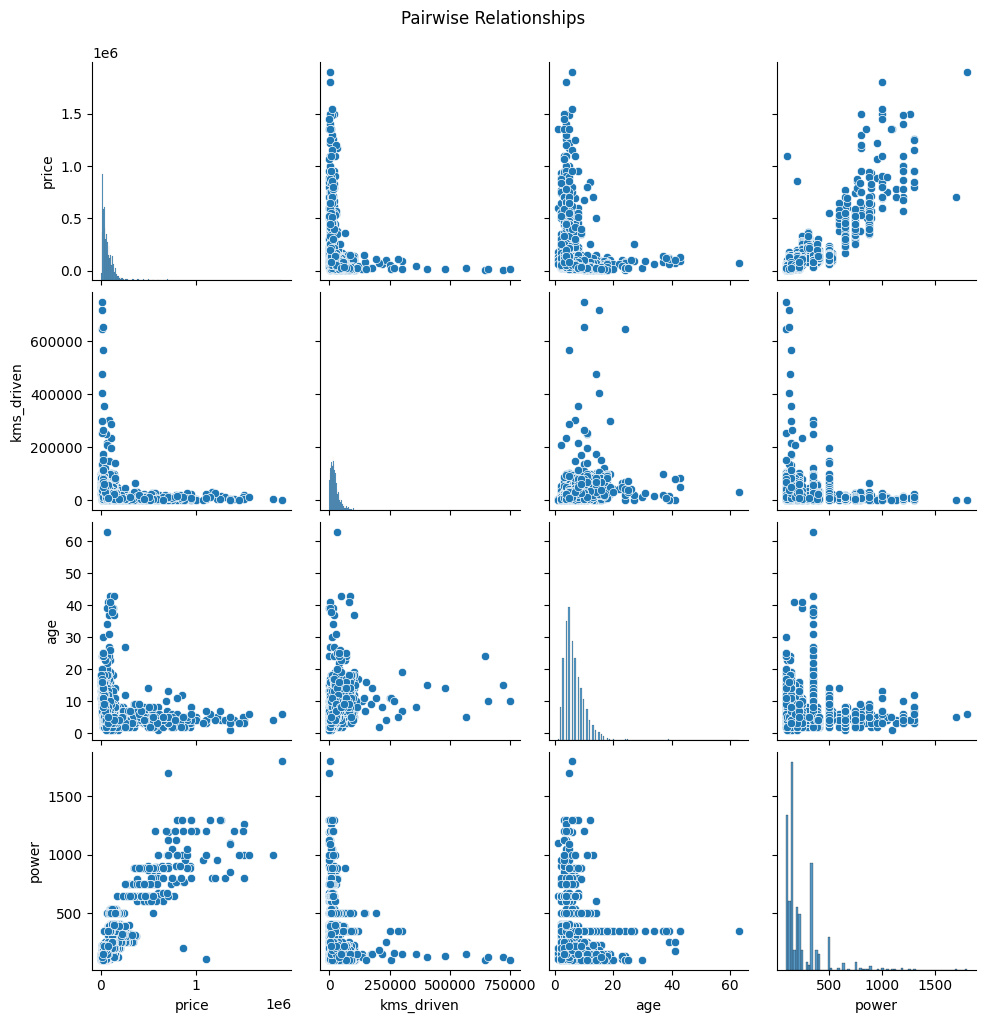

In [7]:
# 7. Pairplot of numeric variables
sns.pairplot(df[num_cols])
plt.suptitle("Pairwise Relationships", y=1.02)
plt.show()

In [9]:
#  Encode non-ordinal categorical columns
from sklearn.preprocessing import OneHotEncoder

onehot_encoder = OneHotEncoder(handle_unknown="ignore", drop="first")
encoded_array = onehot_encoder.fit_transform(df[['brand', 'owner', 'city']]).toarray()
encoded_df = pd.DataFrame(encoded_array, columns=onehot_encoder.get_feature_names_out(['brand', 'owner', 'city']))
encoded_df.index = df.index

# Step 3: Combine with numeric data
df_numeric = df.drop(columns=['brand', 'owner', 'city'])
df_encoded = pd.concat([df_numeric, encoded_df], axis=1)

# df_encoded is now ready for ANN or ML training
print(df_encoded.head())

      price  kms_driven  age  power  brand_Bajaj  brand_Benelli  brand_Ducati  \
0   35000.0     17654.0  3.0  110.0          0.0            0.0           0.0   
1  119900.0     11000.0  4.0  350.0          0.0            0.0           0.0   
2  600000.0       110.0  8.0  675.0          0.0            0.0           0.0   
3   65000.0     16329.0  4.0  180.0          0.0            0.0           0.0   
4   80000.0     10000.0  3.0  150.0          0.0            0.0           0.0   

   brand_Harley-Davidson  brand_Hero  brand_Honda  ...  city_Viramgam  \
0                    0.0         0.0          0.0  ...            0.0   
1                    0.0         0.0          0.0  ...            0.0   
2                    0.0         0.0          0.0  ...            0.0   
3                    0.0         0.0          0.0  ...            0.0   
4                    0.0         0.0          0.0  ...            0.0   

   city_Virar  city_Virudhunagar  city_Visakhapatnam  city_Vizianagaram  \

In [10]:
# Separate Features and Target
x = df_encoded.drop('price', axis=1)
y = df_encoded['price']


In [11]:
x

,kms_driven,age,power,brand_Bajaj,brand_Benelli,brand_Ducati,brand_Harley-Davidson,brand_Hero,brand_Honda,brand_Hyosung,...,city_Viramgam,city_Virar,city_Virudhunagar,city_Visakhapatnam,city_Vizianagaram,city_Warangal,city_Wardha,city_Yamuna Nagar,city_Yemmiganur,city_Zirakpur
0,17654.0,3.0,110.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,11000.0,4.0,350.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,110.0,8.0,675.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,16329.0,4.0,180.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,10000.0,3.0,150.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9362,48587.0,8.0,150.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9369,60000.0,9.0,220.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9370,3430.0,4.0,750.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9371,21300.0,4.0,400.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [12]:
y

0        35000.0
1       119900.0
2       600000.0
3        65000.0
4        80000.0
          ...   
9362     25000.0
9369     35000.0
9370    450000.0
9371    139000.0
9372     80000.0
Name: price, Length: 7324, dtype: float64

In [13]:
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(x)


In [14]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)


In [15]:
model = Sequential()
model.add(Dense(64, activation='relu', input_dim=X_train.shape[1]))
model.add(Dense(32, activation='relu'))
model.add(Dense(1))  # One output neuron for regression

model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mae'])



c:\Users\akpad\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [16]:
history = model.fit(X_train, y_train, validation_split=0.2, epochs=100, batch_size=32)


Epoch 1/100
147/147 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - loss: 21427640320.0000 - mae: 85167.7656 - val_loss: 17381482496.0000 - val_mae: 81638.8047
Epoch 2/100
147/147 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 20796563456.0000 - mae: 83585.7734 - val_loss: 17307322368.0000 - val_mae: 81175.8125
Epoch 3/100
147/147 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 20629932032.0000 - mae: 83488.2656 - val_loss: 17093957632.0000 - val_mae: 79826.5859
Epoch 4/100
147/147 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 20782118912.0000 - mae: 81154.6719 - val_loss: 16693609472.0000 - val_mae: 77234.8047
Epoch 5/100
147/147 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 20849100800.0000 - mae: 79132.8984 - val_loss: 16095029248.0000 - val_mae: 73196.9141
Epoch 6/100
147/147 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 19183032320.0000 - mae: 75752.4375 - val_loss: 15322717184.0000 - val_mae: 67765.5234
Epoch 7/100
147/147 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 17592774656.0000 - mae: 68232.3047 - val_loss: 1443327897

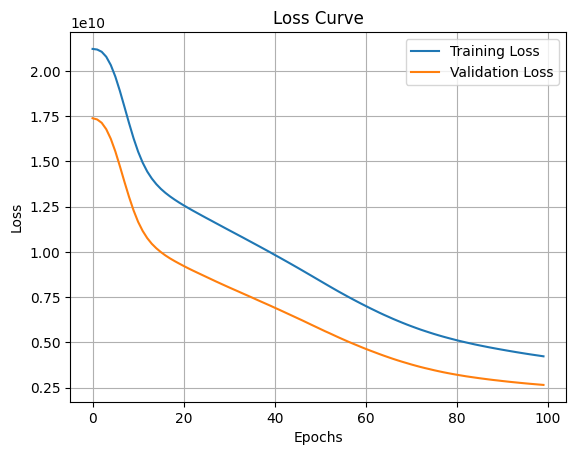

In [ ]:
# Plot loss curve
import matplotlib.pyplot as plt

plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.title('Loss Curve')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.grid(True)
plt.show()




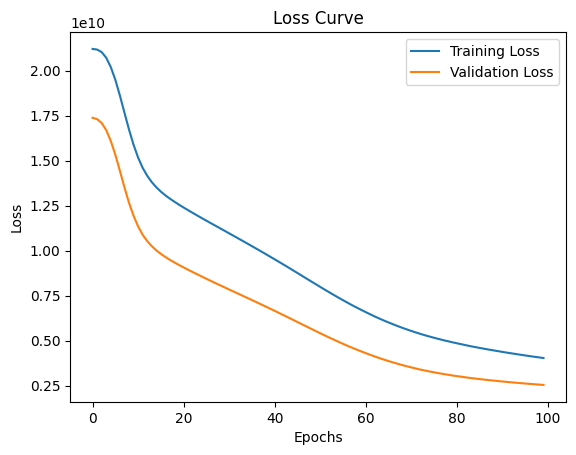

In [17]:
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.title('Loss Curve')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.show()


In [18]:
loss, mae = model.evaluate(X_test, y_test)
print(f"Test Mean Absolute Error: {mae:.2f}")



46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 5266284032.0000 - mae: 25945.4941
Test Mean Absolute Error: 27680.55


In [19]:
# Save the entire model as an HDF5 file
model.save('bike_price_ann_model.h5')
print("Model saved successfully!")


Model saved successfully!


In [20]:
from tensorflow.keras.models import load_model

# Load the saved model
loaded_model = load_model('bike_price_ann_model.h5')
print("Model loaded successfully!")


Model loaded successfully!


In [21]:
import joblib
joblib.dump(onehot_encoder, 'encoder.pkl')
joblib.dump(scaler, 'scaler.pkl')

['scaler.pkl']